# Polya with Memory Kernel

### Run simulation of Polya with Memory Kernel

In [19]:
import sys
import os

sys.path.append(os.path.abspath("../src"))


In [28]:
!julia ../src/sampling/main.jl --help


usage: main.jl [--T T] [--t0 T0] [--p P] [--q Q] [--alpha ALPHA]
               [--sample SAMPLE] [-h]

optional arguments:
  --T T            Total number of time steps in the simulation.
                   (type: Int64, default: 1000)
  --t0 T0          Initialization time. (type: Int64, default: 100)
  --p P            Influence parameter for the previous ball's color.
                   A higher value indicates a greater impact of the
                   previous outcome on the next outcome. (type:
                   Float64, default: 0.9)
  --q Q            Randomness parameter. Represents the base
                   probability of selecting a particular color,
                   irrespective of the urn's current composition.
                   (type: Float64, default: 0.5)
  --alpha ALPHA    Decay exponent parameter. Controls the rate at
                   which the impact of past events diminishes over
                   time. (type: Float64, default: 0.5)
  --sample SAMPLE  Samp

In [20]:
alphas = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

for alpha in alphas:
    command = f"julia ../src/sampling/main.jl --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
T = 1K, t0 = 100, p = 0.9, q = 0.5, sample = 10K
Saved Ct values to data/Ct/T1K_p0.9_q0.5_alpha0.0_t0100_sample10K.csv
Running simulation with the following parameters:
T = 1K, t0 = 100, p = 0.9, q = 0.5, alpha = 0.1, sample = 10K


Progress: 100%|█████████████████████████████████████████| Time: 0:00:59


Saved Ct values to data/Ct/T1K_p0.9_q0.5_alpha0.1_t0100_sample10K.csv
Running simulation with the following parameters:
T = 1K, t0 = 100, p = 0.9, q = 0.5, alpha = 0.3, sample = 10K


Progress: 100%|█████████████████████████████████████████| Time: 0:00:59


Saved Ct values to data/Ct/T1K_p0.9_q0.5_alpha0.3_t0100_sample10K.csv
Running simulation with the following parameters:
T = 1K, t0 = 100, p = 0.9, q = 0.5, alpha = 0.5, sample = 10K


Progress: 100%|█████████████████████████████████████████| Time: 0:00:59


Saved Ct values to data/Ct/T1K_p0.9_q0.5_alpha0.5_t0100_sample10K.csv
Running simulation with the following parameters:
T = 1K, t0 = 100, p = 0.9, q = 0.5, alpha = 0.7, sample = 10K


Progress: 100%|█████████████████████████████████████████| Time: 0:00:59


Saved Ct values to data/Ct/T1K_p0.9_q0.5_alpha0.7_t0100_sample10K.csv
Running simulation with the following parameters:
T = 1K, t0 = 100, p = 0.9, q = 0.5, alpha = 0.9, sample = 10K


Progress: 100%|█████████████████████████████████████████| Time: 0:00:59


Saved Ct values to data/Ct/T1K_p0.9_q0.5_alpha0.9_t0100_sample10K.csv
Running simulation with the following parameters:
T = 1K, t0 = 100, p = 0.9, q = 0.5, alpha = 1.0, sample = 10K


Progress: 100%|█████████████████████████████████████████| Time: 0:00:58


Saved Ct values to data/Ct/T1K_p0.9_q0.5_alpha1.0_t0100_sample10K.csv


### Plot the results

/home/mori/anaconda3/envs/shogo/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mori/anaconda3/envs/shogo/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


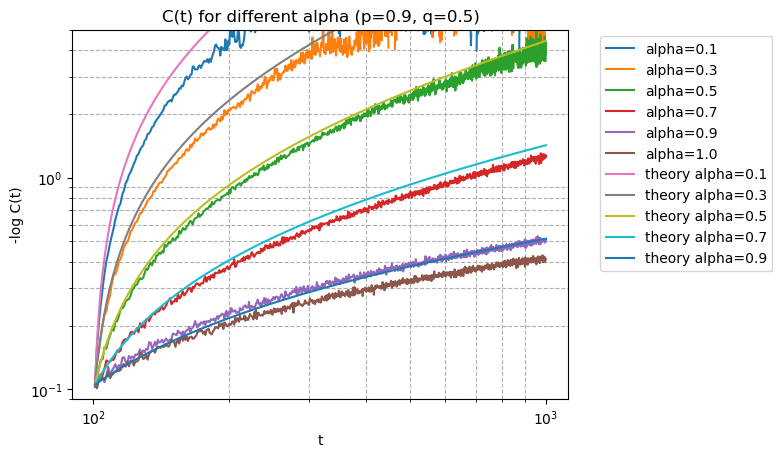

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

result_alpha_01 = pd.read_csv("data/Ct/T1K_p0.9_q0.5_alpha0.1_t0100_sample10K.csv")
result_alpha_03 = pd.read_csv("data/Ct/T1K_p0.9_q0.5_alpha0.3_t0100_sample10K.csv")
result_alpha_05 = pd.read_csv("data/Ct/T1K_p0.9_q0.5_alpha0.5_t0100_sample10K.csv")
result_alpha_07 = pd.read_csv("data/Ct/T1K_p0.9_q0.5_alpha0.7_t0100_sample10K.csv")
result_alpha_09 = pd.read_csv("data/Ct/T1K_p0.9_q0.5_alpha0.9_t0100_sample10K.csv")
result_alpha_10 = pd.read_csv("data/Ct/T1K_p0.9_q0.5_alpha1.0_t0100_sample10K.csv")

result_alpha_01 = result_alpha_01[result_alpha_01["t"] > 100]
result_alpha_03 = result_alpha_03[result_alpha_03["t"] > 100]
result_alpha_05 = result_alpha_05[result_alpha_05["t"] > 100]
result_alpha_07 = result_alpha_07[result_alpha_07["t"] > 100]
result_alpha_09 = result_alpha_09[result_alpha_09["t"] > 100]
result_alpha_10 = result_alpha_10[result_alpha_10["t"] > 100]

t_val = result_alpha_01['t'].to_numpy()
def theory_line(alpha, p=0.9, t0=101, t_val=t_val):
    return p * np.exp(-(1-p)/(1-alpha) * (t_val**(1-alpha) - t0**(1-alpha)))

plt.loglog(t_val, -np.log(result_alpha_01['Ct']), label='alpha=0.1')
plt.loglog(t_val, -np.log(result_alpha_03['Ct']), label='alpha=0.3')
plt.loglog(t_val, -np.log(result_alpha_05['Ct']), label='alpha=0.5')
plt.loglog(t_val, -np.log(result_alpha_07['Ct']), label='alpha=0.7')
plt.loglog(t_val, -np.log(result_alpha_09['Ct']), label='alpha=0.9')
plt.loglog(t_val, -np.log(result_alpha_10['Ct']), label='alpha=1.0')

plt.loglog(t_val, -np.log(theory_line(0.1)), label='theory alpha=0.1')
plt.loglog(t_val, -np.log(theory_line(0.3)), label='theory alpha=0.3')
plt.loglog(t_val, -np.log(theory_line(0.5)), label='theory alpha=0.5')
plt.loglog(t_val, -np.log(theory_line(0.7)), label='theory alpha=0.7')
plt.loglog(t_val, -np.log(theory_line(0.9)), label='theory alpha=0.9')

plt.xlabel('t')
plt.ylabel('-log C(t)')
plt.title('C(t) for different alpha (p=0.9, q=0.5)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(9e-2, 5)
plt.yticks(minor=True)
plt.grid(axis='both', which='minor', linestyle='--')
plt.savefig('figs/Ct_alpha.png', dpi=300, bbox_inches='tight')
plt.show()
